In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels import robust

from notebooks.helpers import pull, round_t2, stretch

In [2]:
def scaler(new_min, new_max):
    return lambda x: new_min + ((x + np.min(x)) / (np.max(x) - np.min(x))) * (new_max - new_min)

def unit_normed(x):
    return (x - x.min()) / (x.max() - x.min())


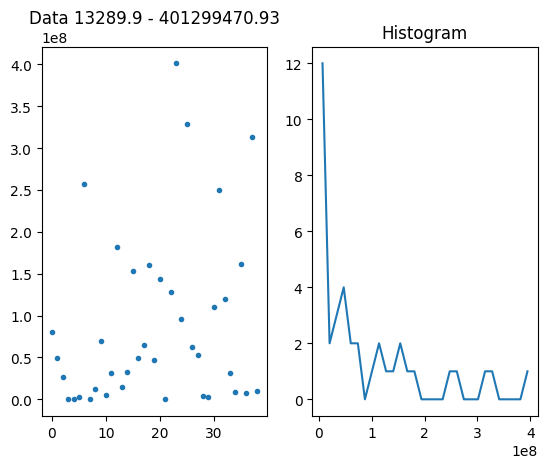

In [3]:
n = 40
data = np.random.randn(n)
data = stretch(50)(data)
data = stretch(200)(data)
data = pull(2, .8)(data)

hist, bin_edges = np.histogram(data, bins=30)
hist_y = (bin_edges[1:] + bin_edges[:-1])/2

fig_a, ax_a = plt.subplot_mosaic([['plot', 'hist']])

ax_a['plot'].plot(data, '.')
ax_a['plot'].set_title(f"Data {round_t2(data.min())} - {round_t2(data.max())}")

ax_a['hist'].plot(hist_y, hist)
ax_a['hist'].set_title('Histogram')

fig_a.show()


[23]


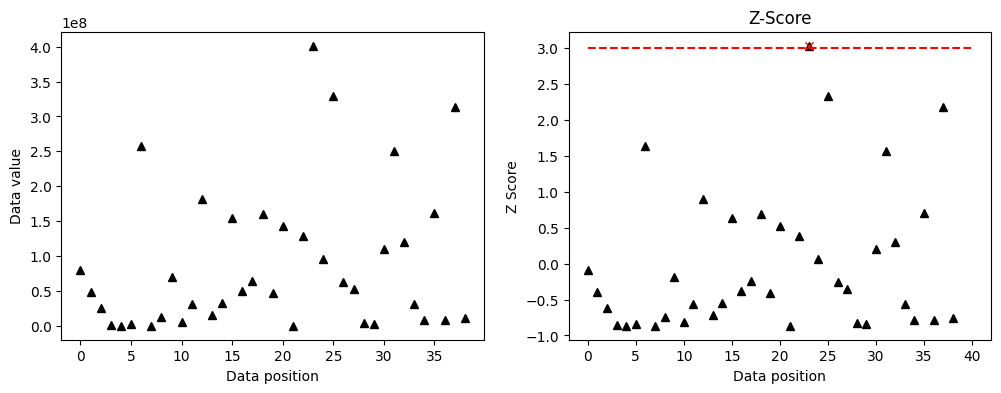

In [4]:
z_score = (data - np.mean(data)) / np.std(data, ddof=1)

fig_b, ax_b = plt.subplot_mosaic([['data', 'z-score']], figsize=[12, 4])

z_score_threshold = 3

outliers = np.where(z_score > z_score_threshold)[0]

print(outliers)

ax_b['data'].plot(data, 'k^')
ax_b['data'].set_xlabel('Data position')
ax_b['data'].set_ylabel('Data value')

ax_b['z-score'].plot(z_score, 'k^')
ax_b['z-score'].plot(outliers, z_score[outliers], 'x', color='red')

ax_b['z-score'].set_xlabel('Data position')
ax_b['z-score'].set_ylabel('Z Score')
ax_b['z-score'].set_title('Z-Score')
ax_b['z-score'].plot([0, n], [z_score_threshold, z_score_threshold], 'r--')
fig_b.show()

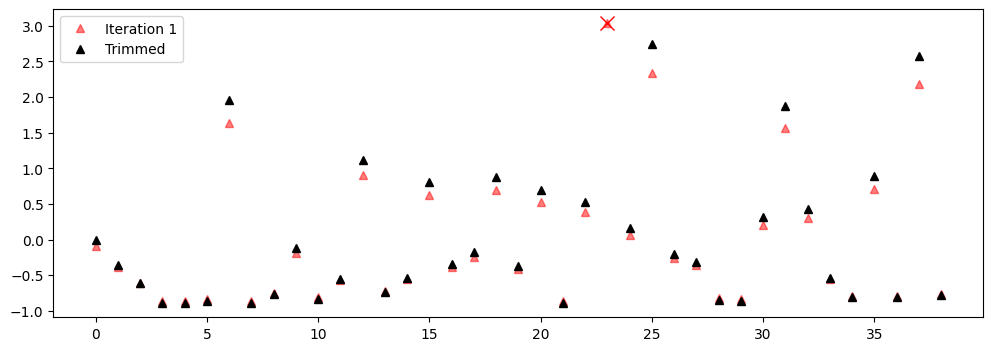

In [5]:
mean_center = lambda x: x - np.nanmean(x)
z_scale = lambda x: mean_center(x) / np.nanstd(x, ddof=1)
z_threshold = 3

fig_c, ax_c = plt.subplots(figsize=(12, 4))

def modified_z_outlier(x, threshold, iteration = 0, plot = None):
    # Z scale data
    z_x = z_scale(x)
    colors = 'rgby'
    color = colors[iteration % len(colors)]

    # Find data values to remove
    outliers = np.absolute(z_x) > threshold

    iteration += 1
    if sum(outliers) == 0:
        if plot is not None:
         plot.plot(z_x, "^", color=(0, 0, 0), label = f"Trimmed", alpha = 1)
        z_x[outliers] = np.nan
        return z_x[outliers]
    else:
        if plot is not None:
            plot.plot(z_x, f"{color}^", label = f"Iteration {iteration}", alpha = 0.5)
            plot.plot(np.where(outliers)[0], z_x[outliers], f"{color}x", markersize=10)

        z_x[outliers] = np.nan
        return modified_z_outlier(z_x, threshold, iteration, plot)



modified_z_outlier(data, z_threshold, plot = ax_c)

ax_c.legend()
fig_c.show()

## Modified Z Score Outlier Detection for Non-normal Distributions
x = (.6745 * x - median(x)) / mad(x)

x = (.6745 * (x - median(x))) / (median(abs(x - median(x)))

Note: .6745 is the 75th percentile of normal distribution

Text(0, 0.5, 'Modified Z Score')

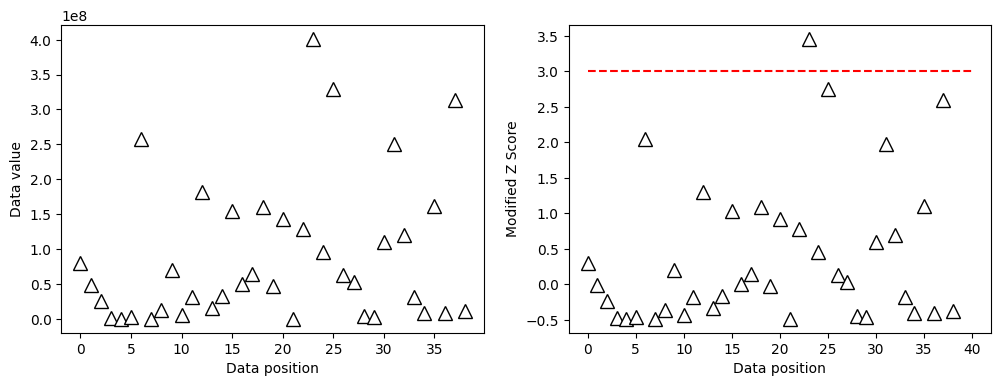

In [6]:
median = np.median(data)
mad = robust.mad(data)

modified_z = .6745 * (data - median) / mad

threshold = 3

fig_d, ax_c = plt.subplot_mosaic([['data', 'modified_z']], figsize=[12, 4])

ax_c['data'].plot(data, 'k^', markerfacecolor='w', markersize=10)
ax_c['data'].set_xlabel('Data position')
ax_c['data'].set_ylabel('Data value')

ax_c['modified_z'].plot(modified_z, 'k^', markerfacecolor='w', markersize=10)
ax_c['modified_z'].plot([0, n], [threshold, threshold], 'r--')
ax_c['modified_z'].set_xlabel('Data position')
ax_c['modified_z'].set_ylabel('Modified Z Score')
